In [ ]:
pip install gymnasium

In [ ]:
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt

Big parameters

In [ ]:
pop_size = 100
half_pop_size = int(pop_size/2)
max_moves = 500

Initial population creation

In [ ]:
population = np.random.choice([0,1], (pop_size, max_moves))

###GA functions

The fitness will be extracted directly from the environment as the number of moves performed before the end of the episode

In [ ]:
def fitness_selection(fitnesses):
  half_pop_size = int(len(fitnesses)/2)
  pairs = np.random.choice(range(pop_size), size=(half_pop_size, 2), p=fitnesses/sum(fitnesses))
  return pairs

def rank_selection(fitnesses):
  half_pop_size = int(len(fitnesses)/2)
  pairs = np.random.choice(range(pop_size), size=(half_pop_size, 2), p=np.argsort(fitnesses)/sum(range(len(fitnesses))))
  return pairs

In [160]:
def crossover(pairs, population):
  pop_size = population.shape[0]

  new_gen = np.empty((pop_size, max_moves))
  for pair_nb in range(pairs.shape[0]):
    pair = pairs[pair_nb]
    dad = population[pair[0],:]
    mom = population[pair[1],:]

    for i in range(max_moves):
      if np.random.choice([True,False]):
        new_gen[2*pair_nb, i] = dad[i]
        new_gen[2*pair_nb+1, i] = mom[i]
      else:
        new_gen[2*pair_nb, i] = mom[i]
        new_gen[2*pair_nb+1, i] = dad[i]

  return new_gen

In [ ]:
def mutation(population):
  pop_size = population.shape[0]

  for i in range(pop_size):
    for j in range(max_moves):

      if np.random.random() <= mutation_rate:
        population[i,j] = 1-population[i,j]
  return population

In [167]:
def pop_diversity(population):
  return np.std(population, 0).mean()

###Environment functions

In [203]:
def play_gen(population, env):
  pop_size = population.shape[0]
  fitnesses = np.empty(pop_size)

  for i in range(pop_size):
    env.reset()

    for t in range(max_moves):
      action = population[i,t]
      observation, reward, done, info, blc = env.step(action)

      if done : break

    fitnesses[i]=t

  return fitnesses

###Environment creation

In [174]:
env = gym.make("CartPole-v1")
population = np.random.choice([0,1], (pop_size, max_moves))

In [279]:
def evolve(selection, nb_gen, pop_size, mutation_rate, elitism=0):
  if selection == "rank" : select = rank_selection
  elif selection=="fitness" : select = fitness_selection
  else : return "Unknown selection method"

  population = np.random.choice([0,1], (pop_size, max_moves))

  best_scores = np.empty(nb_gen)
  avg_scores = np.empty(nb_gen)
  diversity = np.empty(nb_gen)

  for i in range(nb_gen):
    #print("Generation",i)

    population = population.astype(int)

    fit = play_gen(population, env)

    elite = population[np.argmax(fit)].copy()

    best_scores[i] = max(fit)
    avg_scores[i] = np.mean(fit)

    pairs = select(fit)

    population = crossover(pairs, population)

    population = mutation(population)

    population[np.random.choice(range(pop_size))] = elite

    diversity[i] = pop_diversity(population)

  plt.plot(best_scores, label="Best score")
  plt.plot(avg_scores, label="Average score")
  plt.legend()
  plt.xlabel("Generation")
  plt.ylabel("Fitness")
  plt.title("Fitness over time")
  plt.show()

  plt.plot(diversity, color="orange")
  plt.xlabel("Generation")
  plt.ylabel("Average gene STD")
  plt.title("Population diversity over time")
  plt.show()

  print("Final gen best score :", best_scores[nb_gen-1])
  print("Final gen average score :", avg_scores[nb_gen-1])

  return elite

In [281]:
nb_gen = 1000
pop_size = 100
mutation_rate = 0.005

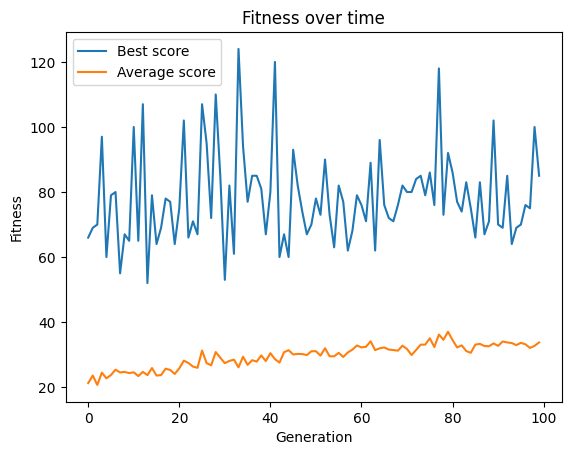

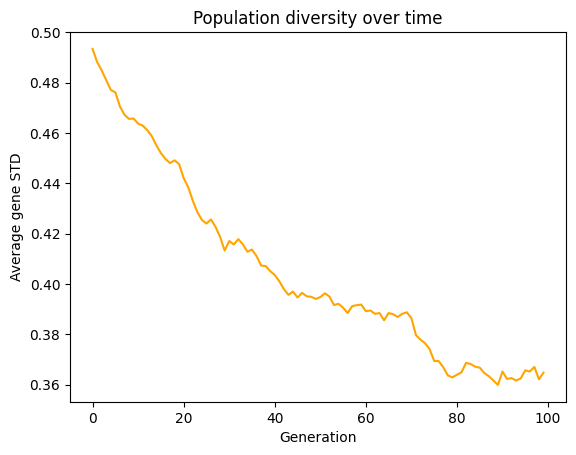

Final gen best score : 85.0
Final gen average score : 33.76


In [282]:
best = evolve("fitness", nb_gen, pop_size, mutation_rate)

In [278]:
play_gen(np.array([best]), env)

array([40.])